# Model Creation For Crowd Couter

In this notebook I'm about to create a model for crowd counter app based on object detection.

- [Data set no.1 (small one)](https://www.kaggle.com/datasets/constantinwerner/human-detection-dataset)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

import helper_functions
import resnet_50

## Data preparation
The first dataset - [link](https://www.kaggle.com/datasets/constantinwerner/human-detection-dataset)

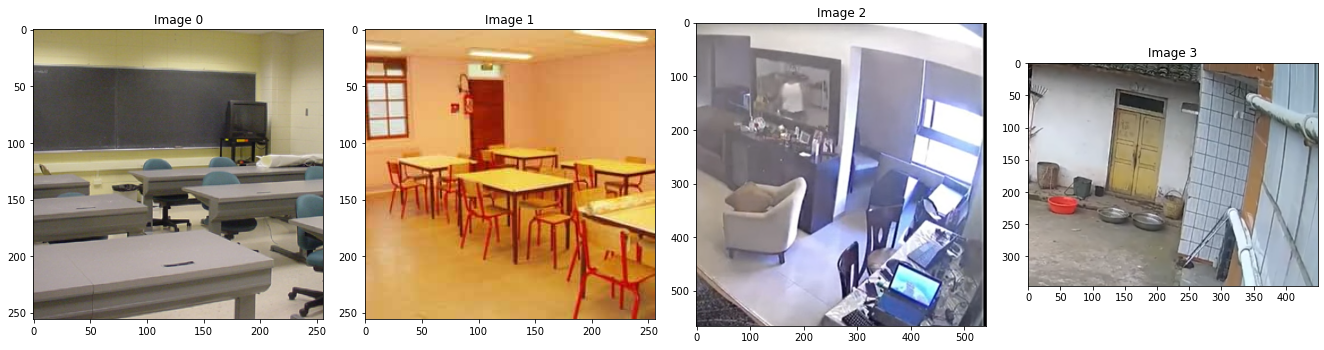

In [6]:
# plot some images without people

helper_functions.plot_images(label="0")

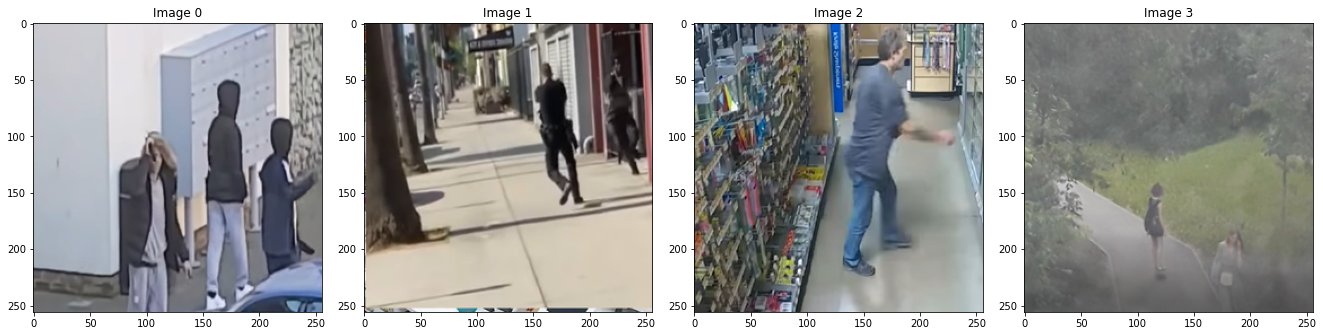

In [7]:
# plot some images with people

helper_functions.plot_images(label="1")

In [ ]:
# as seen in above cells images are in different size, but it's
# not something that data preprocessing can't handle

# preprocessing (generating) data
datagen_v1 = ImageDataGenerator(rescale=1./255,
                                validation_split=0.1)

# seed for further reproduction
tf.random.set_seed(13)

# set path to images
dir = "human-detection-dataset/"

# import data from <dir> and turn it into batches
train_data = datagen_v1.flow_from_directory(directory=dir,
                                            subset='training',
                                            batch_size=8,
                                            target_size=(256,256),   # orig. size of most images
                                            class_mode="binary",
                                            seed=13)

validation_data = datagen_v1.flow_from_directory(directory=dir,
                                                 subset='validation',
                                                 batch_size=8,
                                                 target_size=(256,256),
                                                 class_mode="binary",
                                                 seed=13)

## Classification model

### Baseline Model

In [19]:
# some basic conv model to see if our datagen function works

i = i = Input(shape=(256, 256, 3))

x = Conv2D(10, (3, 3), activation="relu")(i)
x = Conv2D(10, (3, 3), activation="relu")(x)
x = MaxPooling2D((2, 2), padding="valid")(x)

x = Conv2D(10, (3, 3), activation="relu")(x)
x = Conv2D(10, (3, 3), activation="relu")(x)
x = MaxPooling2D((2, 2), padding="valid")(x)

x = Flatten()(x)
x = Dense(1, activation='sigmoid')(x)

baseline_model = Model(i, x)

 ### Baseline Model Training

In [20]:
baseline_model.compile(loss = "binary_crossentropy",
                       optimizer = "Adam",
                       metrics=["accuracy"])

In [21]:
baseline_model_history = baseline_model.fit(train_data,
                                            validation_data=validation_data,
                                            epochs=5)

Epoch 1/5
104/104 [==============================] - 24s 216ms/step - loss: 0.6945 - accuracy: 0.6072 - val_loss: 0.6677 - val_accuracy: 0.6044
Epoch 2/5
104/104 [==============================] - 21s 202ms/step - loss: 0.6696 - accuracy: 0.6096 - val_loss: 0.6578 - val_accuracy: 0.6154
Epoch 3/5
104/104 [==============================] - 21s 206ms/step - loss: 0.6727 - accuracy: 0.6096 - val_loss: 0.6417 - val_accuracy: 0.6044
Epoch 4/5
104/104 [==============================] - 20s 197ms/step - loss: 0.6666 - accuracy: 0.6108 - val_loss: 0.6394 - val_accuracy: 0.6593
Epoch 5/5
104/104 [==============================] - 20s 195ms/step - loss: 0.6616 - accuracy: 0.6205 - val_loss: 0.6314 - val_accuracy: 0.6154


So baseline model is learning something, and whats more important - it's not throwing errors all around. Awesome

### ResNet50

In [11]:
# import model from resnet50.py

resnet50 = resnet_50.get_model()

In [6]:
resnet50.summary()

Model: "ResNet-50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                          

                                                                                                  
 activation_8 (Activation)      (None, 63, 63, 256)  0           ['batch_normalization_9[0][0]']  
                                                                                                  
 conv2d_10 (Conv2D)             (None, 63, 63, 256)  65792       ['activation_8[0][0]']           
                                                                                                  
 batch_normalization_10 (BatchN  (None, 63, 63, 256)  1024       ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_2 (Add)                    (None, 63, 63, 256)  0           ['batch_normalization_10[0][0]', 
                                                                  'activation_6[0][0]']           
          

 ormalization)                                                                                    
                                                                                                  
 add_5 (Add)                    (None, 32, 32, 512)  0           ['batch_normalization_20[0][0]', 
                                                                  'activation_15[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 32, 32, 512)  0           ['add_5[0][0]']                  
                                                                                                  
 conv2d_21 (Conv2D)             (None, 32, 32, 128)  65664       ['activation_18[0][0]']          
                                                                                                  
 batch_normalization_21 (BatchN  (None, 32, 32, 128)  512        ['conv2d_21[0][0]']              
 ormalizat

 add_8 (Add)                    (None, 16, 16, 1024  0           ['batch_normalization_30[0][0]', 
                                )                                 'activation_24[0][0]']          
                                                                                                  
 activation_27 (Activation)     (None, 16, 16, 1024  0           ['add_8[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_31 (Conv2D)             (None, 16, 16, 256)  262400      ['activation_27[0][0]']          
                                                                                                  
 batch_normalization_31 (BatchN  (None, 16, 16, 256)  1024       ['conv2d_31[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_40 (Conv2D)             (None, 16, 16, 256)  262400      ['activation_36[0][0]']          
                                                                                                  
 batch_normalization_40 (BatchN  (None, 16, 16, 256)  1024       ['conv2d_40[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_37 (Activation)     (None, 16, 16, 256)  0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 16, 16, 256)  590080      ['activation_37[0][0]']          
                                                                                                  
 batch_nor

 ormalization)                                                                                    
                                                                                                  
 activation_46 (Activation)     (None, 8, 8, 512)    0           ['batch_normalization_50[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 8, 8, 512)    2359808     ['activation_46[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 8, 8, 512)   2048        ['conv2d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_47 (Activation)     (None, 8, 8, 512)    0           ['batch_normalization_51[0][0]'] 
          

In [18]:
# test ride
resnet50_lr_finding_history = resnet50.fit(train_data,
                                           validation_data=validation_data,
                                           epochs=5)

Epoch 1/5
104/104 [==============================] - 61s 522ms/step - loss: 0.6680 - accuracy: 0.6000 - val_loss: 0.6715 - val_accuracy: 0.5934
Epoch 2/5
104/104 [==============================] - 55s 530ms/step - loss: 0.6757 - accuracy: 0.5952 - val_loss: 0.7656 - val_accuracy: 0.6264
Epoch 3/5
104/104 [==============================] - 54s 519ms/step - loss: 0.6698 - accuracy: 0.6000 - val_loss: 0.6739 - val_accuracy: 0.6044
Epoch 4/5
104/104 [==============================] - 54s 520ms/step - loss: 0.6738 - accuracy: 0.6072 - val_loss: 0.6720 - val_accuracy: 0.6044
Epoch 5/5
104/104 [==============================] - 54s 523ms/step - loss: 0.6748 - accuracy: 0.6000 - val_loss: 0.6779 - val_accuracy: 0.6044


__Conclusion__

So model quality wasn't a cause of poor predictions (in fact baseline model is complex enough to achieve pretty decent accuracy on task like this). Data augumentation should be helpful but bigger dataset may be good start especially when we haven't pretrained model.

#### Find perfect learning rate

In [17]:
resnet50.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [16]:
# learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model with lr_scheduler
resnet50_lr_finding_history = resnet50.fit(train_data,
                                           validation_data=validation_data,
                                           epochs=100,
                                           callbacks=[lr_scheduler])

Epoch 1/100
104/104 [==============================] - 63s 522ms/step - loss: 1.2505 - accuracy: 0.5373 - val_loss: 0.8607 - val_accuracy: 0.3956 - lr: 1.0000e-04
Epoch 2/100
104/104 [==============================] - 53s 512ms/step - loss: 1.3387 - accuracy: 0.5410 - val_loss: 0.7482 - val_accuracy: 0.3956 - lr: 1.1220e-04
Epoch 3/100
104/104 [==============================] - 52s 496ms/step - loss: 1.2932 - accuracy: 0.5723 - val_loss: 1.0997 - val_accuracy: 0.6044 - lr: 1.2589e-04
Epoch 4/100
104/104 [==============================] - 54s 520ms/step - loss: 1.3729 - accuracy: 0.5627 - val_loss: 0.9933 - val_accuracy: 0.2747 - lr: 1.4125e-04
Epoch 5/100
104/104 [==============================] - 54s 517ms/step - loss: 1.2117 - accuracy: 0.5916 - val_loss: 0.8545 - val_accuracy: 0.5055 - lr: 1.5849e-04
Epoch 6/100
104/104 [==============================] - 54s 519ms/step - loss: 1.1200 - accuracy: 0.6145 - val_loss: 5.8968 - val_accuracy: 0.5165 - lr: 1.7783e-04
Epoch 7/100
104/104 [=

Epoch 52/100
104/104 [==============================] - 53s 509ms/step - loss: 0.8053 - accuracy: 0.5964 - val_loss: 2.1467 - val_accuracy: 0.5385 - lr: 0.0355
Epoch 53/100
104/104 [==============================] - 53s 508ms/step - loss: 0.8322 - accuracy: 0.5831 - val_loss: 0.7120 - val_accuracy: 0.4066 - lr: 0.0398
Epoch 54/100
104/104 [==============================] - 54s 519ms/step - loss: 0.7236 - accuracy: 0.5843 - val_loss: 0.6722 - val_accuracy: 0.6044 - lr: 0.0447
Epoch 55/100
104/104 [==============================] - 57s 547ms/step - loss: 0.7081 - accuracy: 0.5867 - val_loss: 5.8142 - val_accuracy: 0.6154 - lr: 0.0501
Epoch 56/100
  5/104 [>.............................] - ETA: 43s - loss: 0.6497 - accuracy: 0.6250

KeyboardInterrupt: 